In [ ]:
###

In [28]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df_diamonds= pd.read_csv("..\data\diamonds_train.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\paul_\AppData\Local\Temp\ipykernel_65216\1857739754.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_diamonds= pd.read_csv("..\data\diamonds_train.csv")


          id  carat        cut color clarity  depth  table     x     y     z  \
0          0   0.79  Very Good     F     SI1   62.7   60.0  5.82  5.89  3.67   
1          1   1.20      Ideal     J     VS1   61.0   57.0  6.81  6.89  4.18   
2          2   1.57    Premium     H     SI1   62.2   61.0  7.38  7.32  4.57   
3          3   0.90  Very Good     F     SI1   63.8   54.0  6.09  6.13  3.90   
4          4   0.50  Very Good     F     VS1   62.9   58.0  5.05  5.09  3.19   
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...   
13480  13480   0.57      Ideal     E     SI1   61.9   56.0  5.35  5.32  3.30   
13481  13481   0.71      Ideal     I     VS2   62.2   55.0  5.71  5.73  3.56   
13482  13482   0.70      Ideal     F     VS1   61.6   55.0  5.75  5.71  3.53   
13483  13483   0.70  Very Good     F     SI2   58.8   57.0  5.85  5.89  3.45   
13484  13484   0.40      Ideal     I    VVS2   62.4   55.0  4.70  4.73  2.94   

                city       price  
0   

In [4]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   cut      40455 non-null  object 
 9   color    40455 non-null  object 
 10  clarity  40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [5]:
df_diamonds.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


In [6]:
diamons_encoded= pd.get_dummies(df_diamonds, columns=["city"], dtype=int)
diamons_encoded

,price,carat,depth,table,x,y,z,cut,color,clarity,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2,...,0,0,0,0,0,0,0,0,0,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2,...,1,0,0,0,0,0,0,0,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1,...,0,1,0,0,0,0,0,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,Good,D,SI1,...,1,0,0,0,0,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.7,57.0,7.10,7.04,4.43,Ideal,G,VS1,...,0,0,0,0,0,0,0,0,0,0
40451,12615,2.02,57.1,60.0,8.31,8.25,4.73,Good,F,SI2,...,0,0,0,0,1,0,0,0,0,0
40452,5457,1.01,62.7,56.0,6.37,6.42,4.01,Ideal,H,SI1,...,1,0,0,0,0,0,0,0,0,0
40453,456,0.33,61.9,54.3,4.45,4.47,2.76,Ideal,J,VS1,...,1,0,0,0,0,0,0,0,0,0


In [7]:
diamons_encoded1= pd.get_dummies(diamons_encoded, columns=["cut"], dtype=int)
diamons_encoded1

,price,carat,depth,table,x,y,z,color,clarity,city_Amsterdam,...,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,J,VS2,0,...,0,0,0,0,0,0,0,0,1,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,H,VS2,0,...,0,0,0,0,0,0,0,0,0,1
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,G,VS1,0,...,0,0,0,0,0,1,0,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,D,SI1,0,...,0,0,0,0,0,0,1,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,G,SI1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.7,57.0,7.10,7.04,4.43,G,VS1,0,...,0,0,0,0,0,0,0,1,0,0
40451,12615,2.02,57.1,60.0,8.31,8.25,4.73,F,SI2,0,...,0,0,0,0,0,0,1,0,0,0
40452,5457,1.01,62.7,56.0,6.37,6.42,4.01,H,SI1,0,...,0,0,0,0,0,0,0,1,0,0
40453,456,0.33,61.9,54.3,4.45,4.47,2.76,J,VS1,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
diamons_encoded2= pd.get_dummies(diamons_encoded1, columns=["color"], dtype=int)
diamons_encoded2

,price,carat,depth,table,x,y,z,clarity,city_Amsterdam,city_Antwerp,...,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,VS2,0,0,...,0,1,0,0,0,0,0,0,0,1
1,505,0.32,63.0,57.0,4.35,4.38,2.75,VS2,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,VS1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,SI1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,SI1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.7,57.0,7.10,7.04,4.43,VS1,0,1,...,1,0,0,0,0,0,1,0,0,0
40451,12615,2.02,57.1,60.0,8.31,8.25,4.73,SI2,0,0,...,0,0,0,0,0,1,0,0,0,0
40452,5457,1.01,62.7,56.0,6.37,6.42,4.01,SI1,0,0,...,1,0,0,0,0,0,0,1,0,0
40453,456,0.33,61.9,54.3,4.45,4.47,2.76,VS1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [9]:
diamons_encoded3= pd.get_dummies(diamons_encoded2, columns=["clarity"], dtype=int)
diamons_encoded3

,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.7,57.0,7.10,7.04,4.43,0,1,0,...,0,0,0,0,0,0,1,0,0,0
40451,12615,2.02,57.1,60.0,8.31,8.25,4.73,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40452,5457,1.01,62.7,56.0,6.37,6.42,4.01,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40453,456,0.33,61.9,54.3,4.45,4.47,2.76,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [10]:
diamons_encoded3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               40455 non-null  int64  
 1   carat               40455 non-null  float64
 2   depth               40455 non-null  float64
 3   table               40455 non-null  float64
 4   x                   40455 non-null  float64
 5   y                   40455 non-null  float64
 6   z                   40455 non-null  float64
 7   city_Amsterdam      40455 non-null  int32  
 8   city_Antwerp        40455 non-null  int32  
 9   city_Dubai          40455 non-null  int32  
 10  city_Kimberly       40455 non-null  int32  
 11  city_Las Vegas      40455 non-null  int32  
 12  city_London         40455 non-null  int32  
 13  city_Luxembourg     40455 non-null  int32  
 14  city_Madrid         40455 non-null  int32  
 15  city_New York City  40455 non-null  int32  
 16  city

In [11]:
diamons_encoded3.describe()

,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154,0.061426,0.124756,0.063305,...,0.099666,0.052898,0.013917,0.032802,0.240984,0.171277,0.149944,0.228600,0.068570,0.093907
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062,0.240114,0.330446,0.243514,...,0.299558,0.223833,0.117147,0.178120,0.427686,0.376755,0.357021,0.419936,0.252725,0.291703
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X, y = datasets.load_diabetes(return_X_y=True)

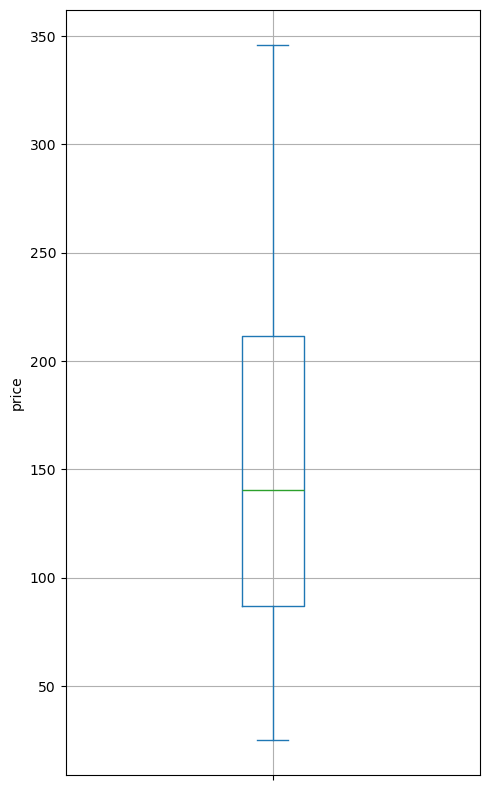

In [14]:
ax = pd.Series(y).plot.box(figsize=(5, 8))
ax.set_ylabel('price')
plt.tight_layout()
plt.grid()
plt.show()

In [1]:
x = diamons_encoded3.drop('price', axis=1)
y = diamons_encoded3['price']


NameError: name 'diamons_encoded3' is not defined

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32364, 39), X_test: (8091, 39), y_train: (32364,), y_test: (8091,)


In [25]:
model_rmse = GradientBoostingRegressor(random_state = 42)
model_rmse.fit(X_train, y_train)
y_pred = model_rmse.predict(X_test)

hyperparameters = model_rmse.get_params()

rmse = mean_squared_error(y_test, y_pred)**0.5

print(type(model_rmse), '\n')
print(rmse, '\n')

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> 

717.1221130892641 



In [20]:
selector = SelectKBest(score_func=f_regression, k='all')
print("Original feature shape:", X.shape)

selector = selector.fit(X, y)
new_X = selector.transform(X)
print("Scores:", selector.scores_)
print("Transformed feature shape:", new_X.shape)

NameError: name 'SelectKBest' is not defined

In [30]:
corr_matrix = df_diamonds.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

ValueError: could not convert string to float: 'Premium'

In [26]:
usecols = ["id", "price"]
df = pd.read_csv("ruta_del_archivo.csv", usecols=usecols)

FileNotFoundError: [Errno 2] No such file or directory: 'ruta_del_archivo.csv'

In [22]:
diamons_encoded3.to_csv('archivo.csv', index=False)

In [21]:
%%time
model
model = LinearRegression()

#model = GradientBoostingRegressor(random_state = 42)

#model = RandomForestRegressor(random_state = 42)


model.fit(X, y)

y_pred = model.predict(X)

hyperparameters = model.get_params()

print(type(model), '\n')
print('Model hyperparameters:', hyperparameters, '\n')

NameError: name 'LinearRegression' is not defined

In [24]:
#df_diamonds['cut'] = pd.to_numeric(df_diamonds['cut'], errors='coerce')
wrong_type_columns=["city","carat", "depth", "table", "x", "y", "z"]
df_diamonds[wrong_type_columns] = df_diamonds[wrong_type_columns].apply(pd.to_numeric, errors='coerce')
df_diamonds

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,NaN,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,NaN,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,NaN,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,NaN,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,NaN,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1
...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,NaN,62.7,57.0,7.10,7.04,4.43,Ideal,G,VS1
40451,12615,2.02,NaN,57.1,60.0,8.31,8.25,4.73,Good,F,SI2
40452,5457,1.01,NaN,62.7,56.0,6.37,6.42,4.01,Ideal,H,SI1
40453,456,0.33,NaN,61.9,54.3,4.45,4.47,2.76,Ideal,J,VS1


In [14]:
X = df_diamonds[['carat', 'cut', 'color', 'clarity']]
y = df_diamonds['price']

# Convertir las columnas categóricas al tipo de datos Pandas category
X['cut'] = X['cut'].astype('category')
X['color'] = X['color'].astype('category')
X['clarity'] = X['clarity'].astype('category')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

C:\Users\paul_\AppData\Local\Temp\ipykernel_55764\2522643289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cut'] = X['cut'].astype('category')
C:\Users\paul_\AppData\Local\Temp\ipykernel_55764\2522643289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['color'] = X['color'].astype('category')
C:\Users\paul_\AppData\Local\Temp\ipykernel_55764\2522643289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

NameError: name 'train_test_split' is not defined

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse